In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
%matplotlib inline

/Users/applemacbook/anaconda/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/applemacbook/anaconda/envs/py3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_pickle('data/test_cleanedpickle_4')

In [3]:
# Check shape of data (rows, columns)
df.values.shape

(11573, 10)

In [4]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 10 columns):
SalesID                     11573 non-null int64
MachineHoursCurrentMeter    11573 non-null float64
Size                        11573 non-null int64
Usage                       11573 non-null int64
Age                         11573 non-null int64
ProductGroup_MG             11573 non-null uint8
ProductGroup_SSL            11573 non-null uint8
ProductGroup_TEX            11573 non-null uint8
ProductGroup_TTT            11573 non-null uint8
ProductGroup_WL             11573 non-null uint8
dtypes: float64(1), int64(4), uint8(5)
memory usage: 508.7 KB


In [131]:
# Reviewing data
df.head()

,SalesID,MachineHoursCurrentMeter,ProductGroup,Size,Usage,Age
0,1222837,0.0,TEX,5,0,1017
1,1222839,4412.0,TEX,5,2,11
2,1222841,10127.0,TEX,5,2,17
3,1222843,4682.0,TEX,5,1,1017
4,1222845,8150.0,WL,0,2,15


In [5]:
# Reviewing data in each column
for col in df:
    print(col)
    print(df[col].head())
    print('------------\n')

SalesID
0    1222837
1    1222839
2    1222841
3    1222843
4    1222845
Name: SalesID, dtype: int64
------------

MachineHoursCurrentMeter
0        0.0
1     4412.0
2    10127.0
3     4682.0
4     8150.0
Name: MachineHoursCurrentMeter, dtype: float64
------------

Size
0    5
1    5
2    5
3    5
4    0
Name: Size, dtype: int64
------------

Usage
0    0
1    2
2    2
3    1
4    2
Name: Usage, dtype: int64
------------

Age
0    1017
1      11
2      17
3    1017
4      15
Name: Age, dtype: int64
------------

ProductGroup_MG
0    0
1    0
2    0
3    0
4    0
Name: ProductGroup_MG, dtype: uint8
------------

ProductGroup_SSL
0    0
1    0
2    0
3    0
4    0
Name: ProductGroup_SSL, dtype: uint8
------------

ProductGroup_TEX
0    1
1    1
2    1
3    1
4    0
Name: ProductGroup_TEX, dtype: uint8
------------

ProductGroup_TTT
0    0
1    0
2    0
3    0
4    0
Name: ProductGroup_TTT, dtype: uint8
------------

ProductGroup_WL
0    0
1    0
2    0
3    0
4    1
Name: ProductGroup_WL

In [132]:
# Filling MachineHours
df.MachineHoursCurrentMeter.fillna(value=df.MachineHoursCurrentMeter.mean(), inplace=True)

In [6]:
# Checking percentage of null values
nulls = df.isnull().sum()/401125
nulls.sort_values(ascending=False)

ProductGroup_WL             0.0
ProductGroup_TTT            0.0
ProductGroup_TEX            0.0
ProductGroup_SSL            0.0
ProductGroup_MG             0.0
Age                         0.0
Usage                       0.0
Size                        0.0
MachineHoursCurrentMeter    0.0
SalesID                     0.0
dtype: float64

In [134]:
# Converting categorical data to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [135]:
# Checking data after conversion
df.head()

,SalesID,MachineHoursCurrentMeter,Size,Usage,Age,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL
0,1222837,0.0,5,0,1017,0,0,1,0,0
1,1222839,4412.0,5,2,11,0,0,1,0,0
2,1222841,10127.0,5,2,17,0,0,1,0,0
3,1222843,4682.0,5,1,1017,0,0,1,0,0
4,1222845,8150.0,0,2,15,0,0,0,0,1


In [7]:
# Checking numerical values
df.describe()

,SalesID,MachineHoursCurrentMeter,Size,Usage,Age,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL
count,1.157300e+04,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000
mean,5.180809e+06,5482.141380,1.887583,0.593105,121.668193,0.066448,0.131599,0.264668,0.178173,0.187505
std,1.619443e+06,4089.486107,2.164125,0.903431,305.481901,0.249074,0.338069,0.441175,0.382675,0.390334
min,1.222837e+06,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.312616e+06,5283.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.264848e+06,5482.141380,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.286342e+06,5482.141380,4.000000,1.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6.333349e+06,89200.000000,6.000000,3.000000,1017.000000,1.000000,1.000000,1.000000,1.000000,1.000000


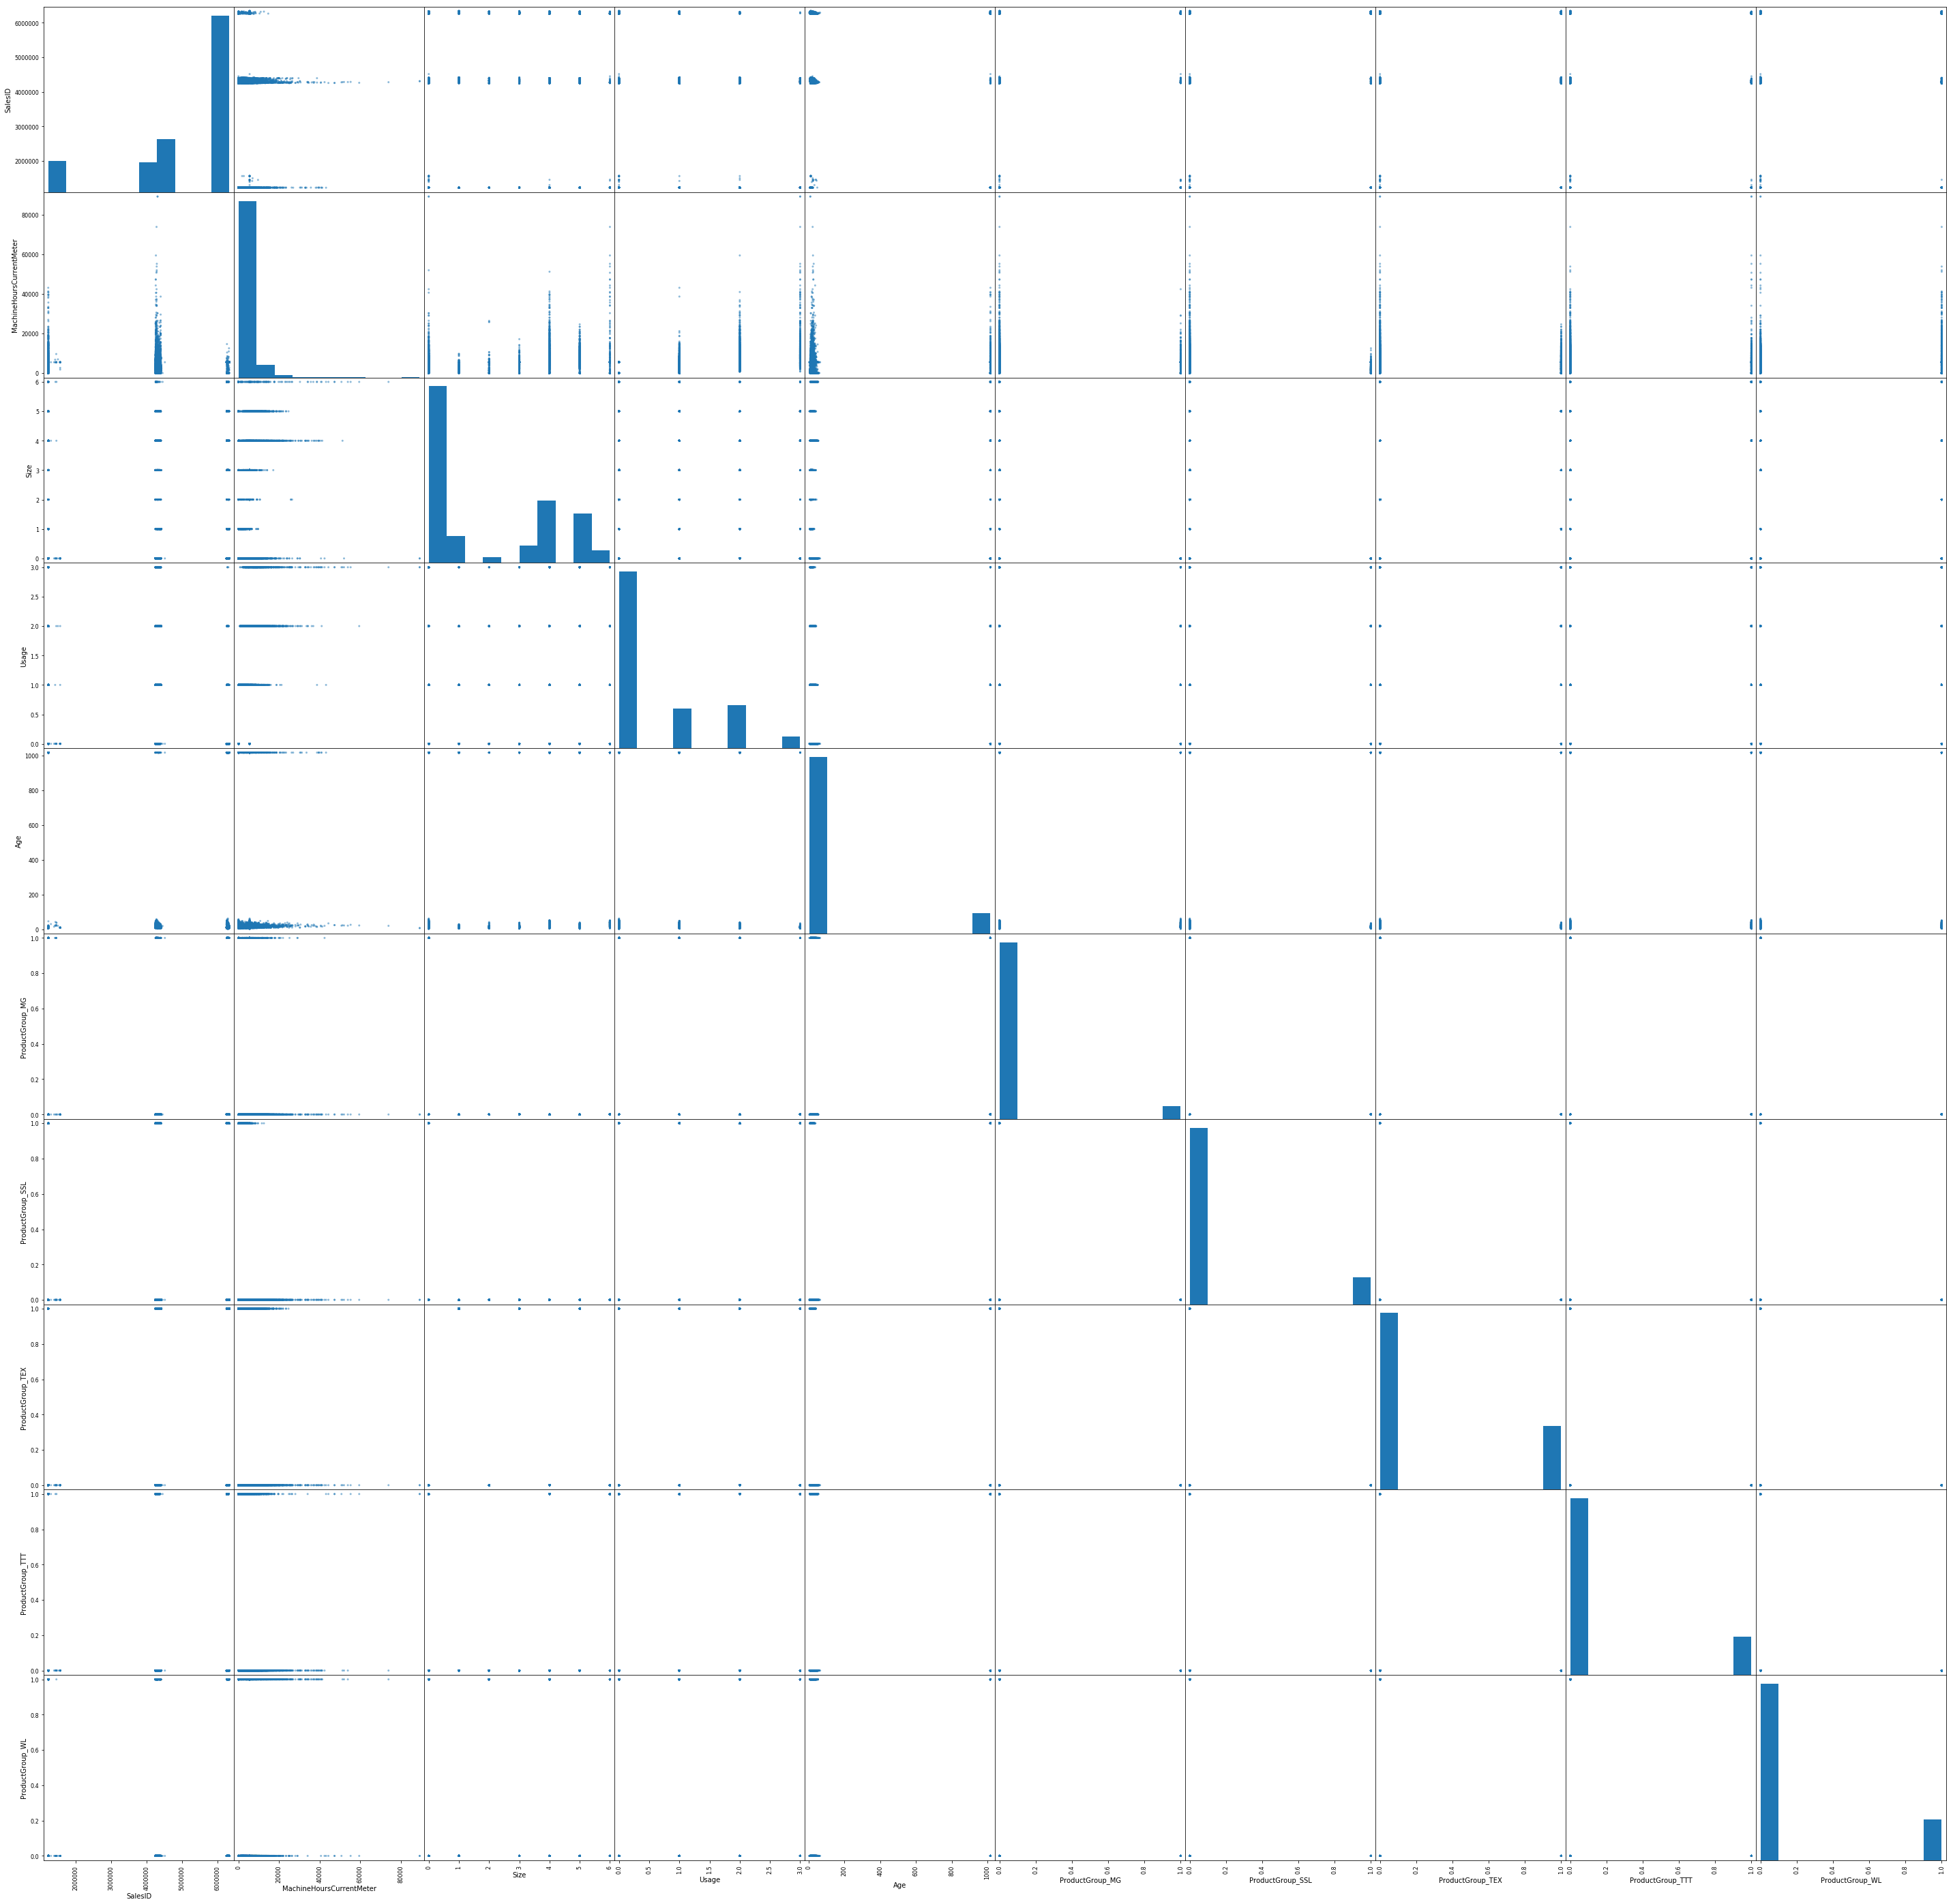

In [11]:
# Reviewing data visually using scatter matrix
pd.plotting.scatter_matrix(df, figsize=(50,50));

In [136]:
# Pickling cleaned data
df.to_pickle('data/test_cleanedpickle_4')